* NAME: Rishabh Patil
* SAP: 60009200056
* BATCH: D12

In [ ]:
!pip install ultralytics -q

Loading libraries

In [ ]:
# Object Detecion
import cv2
from ultralytics import YOLO
#plots
import matplotlib.pyplot as plt
import seaborn as sns

#basics
import pandas as pd
import numpy as np
import os
import subprocess

from tqdm.notebook import tqdm

# Display image and videos
import IPython
from IPython.display import Video, display
%matplotlib inline

In [ ]:
# Video  path for experiment
path = 'https://docs.google.com/uc?export=download&confirm=&id=1pz68D1Gsx80MoPg-_q-IbEdESEmyVLm-'

In [ ]:
frac = 0.65
display(Video(data=path, height=int(720*frac), width=int(1280*frac)))

In [ ]:
import os, time, random
import numpy as np
import pandas as pd
import cv2, torch
from tqdm.auto import tqdm
import shutil as sh

from IPython.display import Image, clear_output
import matplotlib.pyplot as plt
%matplotlib inline

Initializing YOLOv5

In [ ]:
!git clone https://github.com/ultralytics/yolov5  # clone repo
!pip install -qU pycocotools
!pip install -qr yolov5/requirements.txt  # install dependencies
!cp yolov5/requirements.txt ./

fatal: destination path 'yolov5' already exists and is not an empty directory.


In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


Defining co-ordinates

In [ ]:
img_h, img_w, num_channels = (380, 676, 3)

df = pd.read_csv('/content/drive/MyDrive/data/train_solution_bounding_boxes (1).csv')
df.rename(columns={'image':'image_id'}, inplace=True)
df['image_id'] = df['image_id'].apply(lambda x: x.split('.')[0])
df['x_center'] = (df['xmin'] + df['xmax'])/2
df['y_center'] = (df['ymin'] + df['ymax'])/2
df['w'] = df['xmax'] - df['xmin']
df['h'] = df['ymax'] - df['ymin']
df['classes'] = 0
df['x_center'] = df['x_center']/img_w
df['w'] = df['w']/img_w
df['y_center'] = df['y_center']/img_h
df['h'] = df['h']/img_h
df.head()

,image_id,xmin,ymin,xmax,ymax,x_center,y_center,w,h,classes
0,vid_4_1000,281.259045,187.035071,327.727931,223.225547,0.450434,0.539817,0.068741,0.095238,0
1,vid_4_10000,15.163531,187.035071,120.329957,236.430180,0.100217,0.557191,0.155572,0.129987,0
2,vid_4_10040,239.192475,176.764801,361.968162,236.430180,0.444645,0.543678,0.181621,0.157014,0
3,vid_4_10020,496.483358,172.363256,630.020260,231.539575,0.833213,0.531451,0.197540,0.155727,0
4,vid_4_10060,16.630970,186.546010,132.558611,238.386422,0.110347,0.559122,0.171491,0.136422,0


In [ ]:
index = list(set(df.image_id))
image = random.choice(index)
print("Image ID: %s"%(image))
img = cv2.imread(f'/content/drive/MyDrive/data/training_images/{image}.jpg')
img.shape

Image ID: vid_4_11020


(380, 676, 3)

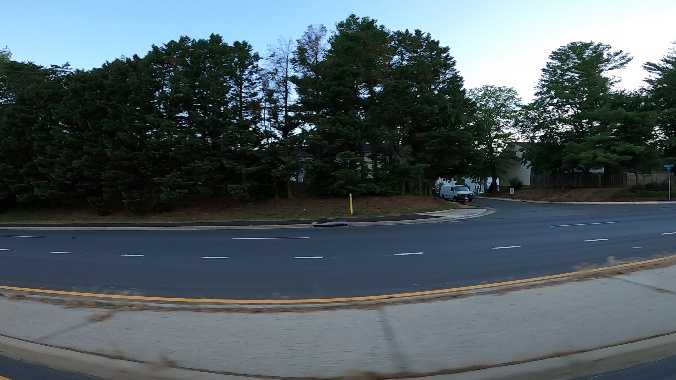

In [ ]:
image = random.choice(index)
Image(filename=f'/content/drive/MyDrive/data/training_images/{image}.jpg',width=600)

In [ ]:
source = 'training_images'
if True:
    for fold in [0]:
        val_index = index[len(index)*fold//5:len(index)*(fold+1)//5]
        for name,mini in tqdm(df.groupby('image_id')):
            if name in val_index:
                path2save = 'val2017/'
            else:
                path2save = 'train2017/'
            if not os.path.exists('/tmp/convertor/fold{}/labels/'.format(fold)+path2save):
                os.makedirs('/tmp/convertor/fold{}/labels/'.format(fold)+path2save)
            with open('/tmp/convertor/fold{}/labels/'.format(fold)+path2save+name+".txt", 'w+') as f:
                row = mini[['classes','x_center','y_center','w','h']].astype(float).values
                row = row.astype(str)
                for j in range(len(row)):
                    text = ' '.join(row[j])
                    f.write(text)
                    f.write("\n")
            if not os.path.exists('/tmp/convertor/fold{}/images/{}'.format(fold,path2save)):
                os.makedirs('/tmp/convertor/fold{}/images/{}'.format(fold,path2save))
            sh.copy("/content/drive/MyDrive/data/{}/{}.jpg".format(source,name),'/tmp/convertor/fold{}/images/{}/{}.jpg'.format(fold,path2save,name))

  0%|          | 0/355 [00:00<?, ?it/s]

Experimentation

In [ ]:
!python yolov5/detect.py --weights yolov5/yolov5s.pt --img 676 --conf 0.4 --source /content/drive/MyDrive/data/testing_images

detect: weights=['yolov5/yolov5s.pt'], source=/content/drive/MyDrive/data/testing_images, data=yolov5/data/coco128.yaml, imgsz=[676, 676], conf_thres=0.4, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=yolov5/runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-218-g9e97ac3 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)

100% 14.1M/14.1M [00:00<00:00, 73.6MB/s]

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
WARNING ⚠️ --img-size [676, 676] must be multiple of max stride 32, updating to [704, 704]
image 1/175 /content/drive/.shortcut-targets-by-id/1arPa_lfVXnSvGRT-CGrufg3zMSJxqBca/data/testing_images/vid_5_25100.jpg: 416x704 (no detections), 45.3ms
image 2/175 /content/drive/.sho

In [ ]:
predicted_files = []
for (dirpath, dirnames, filenames) in os.walk("/content/yolov5/runs/detect/exp"):
    predicted_files.extend(filenames)

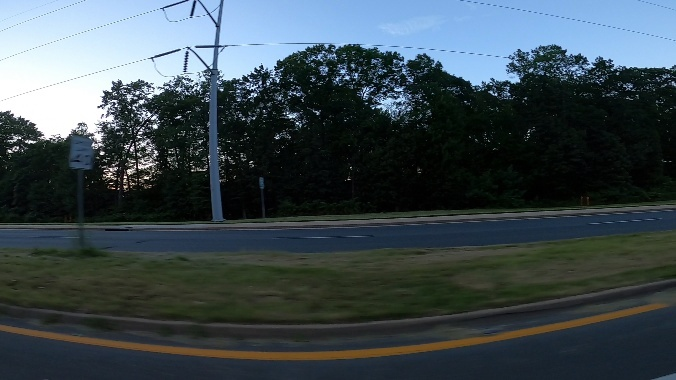

In [ ]:
Image(filename=f'/content/yolov5/runs/detect/exp/{random.choice(predicted_files)}')

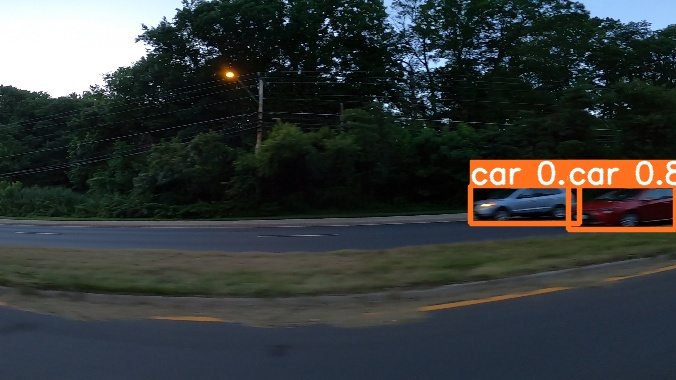

In [ ]:
Image(filename=f'/content/yolov5/runs/detect/exp/{random.choice(predicted_files)}')

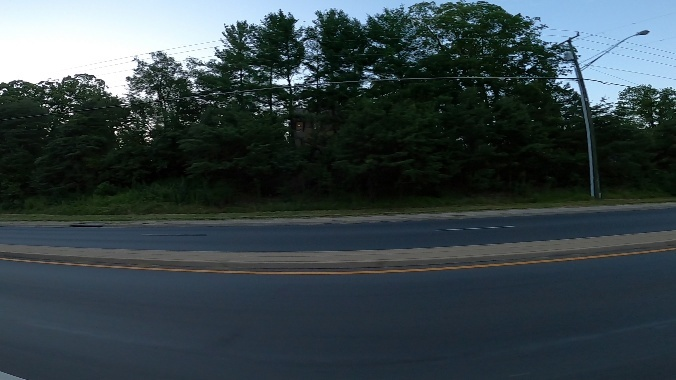

In [ ]:
Image(filename=f'/content/yolov5/runs/detect/exp/{random.choice(predicted_files)}')

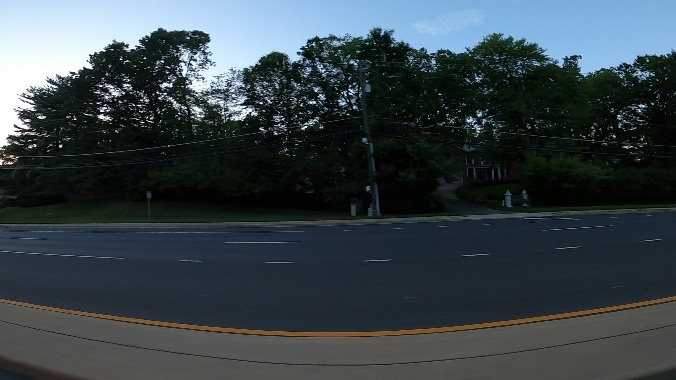

In [ ]:
Image(filename=f'/content/yolov5/runs/detect/exp/{random.choice(predicted_files)}')

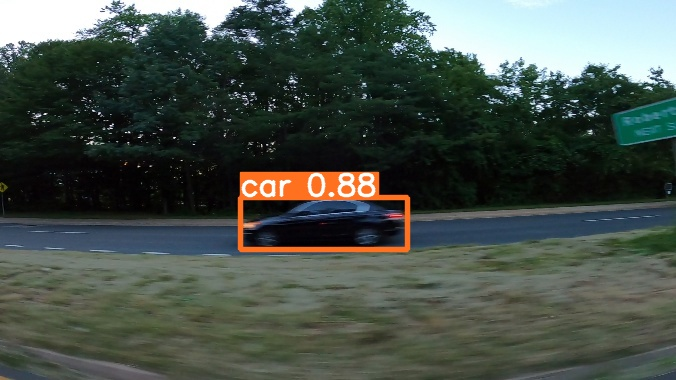

In [ ]:
Image(filename=f'/content/yolov5/runs/detect/exp/{random.choice(predicted_files)}')

In [ ]:
!gdown "https://docs.google.com/uc?export=download&confirm=&id=1pz68D1Gsx80MoPg-_q-IbEdESEmyVLm-"

Downloading...
From: https://docs.google.com/uc?export=download&confirm=&id=1pz68D1Gsx80MoPg-_q-IbEdESEmyVLm-
To: /content/vehicle-counting.mp4
100% 35.3M/35.3M [00:00<00:00, 56.8MB/s]


In [ ]:
!python yolov5/detect.py --weights yolov5/yolov5s.pt --img 676 --conf 0.4 --source /content/vehicle-counting.mp4

detect: weights=['yolov5/yolov5s.pt'], source=/content/vehicle-counting.mp4, data=yolov5/data/coco128.yaml, imgsz=[676, 676], conf_thres=0.4, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=yolov5/runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-218-g9e97ac3 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
WARNING ⚠️ --img-size [676, 676] must be multiple of max stride 32, updating to [704, 704]
video 1/1 (1/538) /content/vehicle-counting.mp4: 416x704 4 cars, 1 truck, 48.3ms
video 1/1 (2/538) /content/vehicle-counting.mp4: 416x704 3 cars, 1 truck, 9.6ms
video 1/1 (3/538) /content/vehicle-counting.mp4: 416x704 4 cars, 1 truck, 9.6ms